# Fire and Smoke Detector

Deep Learning and Machine Learning techniques can be applied to wide versatile industrial use cases. Many of the hard to dealt problems and issues can be solved by deep-learning, without much investment but by taking advantage of the techniques, which are accurate, verifiable and increases bottomline of the client much faster and easier way.

This project is to give a POC (proof of concept) to identify smoke, fire and neutral cases. Fire accidents are not uncommon and has catastrophic impact on the company both interms of social and financial terms. Fire accidents like most recent one in PP-2 is glaring example of repercussions on the company financial conditions. It is not the objective of this report to state fire accidents are entirely avoidable by theses techniques, but these will greatly improve our efficacy in keeping 24 hour surveillance on the critical equipments like turbines, which are prone to fire accidents.

This report will provide a ML(Machine Learning) model and testable application, which can be tested by anyone to test the efficiency of the model thus verifying the claims made by the report. This application can be deployed on device and can work as 24X365 surveillance, which can be done once after sufficient interest emanates.

## Training of Model

The training dataset taken from the [deepquest.ai](https://github.com/DeepQuestAI/Fire-Smoke-Dataset) and training is done using fastai library on pytorch framework. This Model will predict three classes
1. Fire
2. Smoke
3. Neutral


We are more interested in Smoke class as we should be able to predict the fire and act immediately to avoid any eventualities. Inaddition to smoke, model can predict fire too. 

### Preparing and Cleaning Dataset

In [9]:
from fastai.vision.all import *

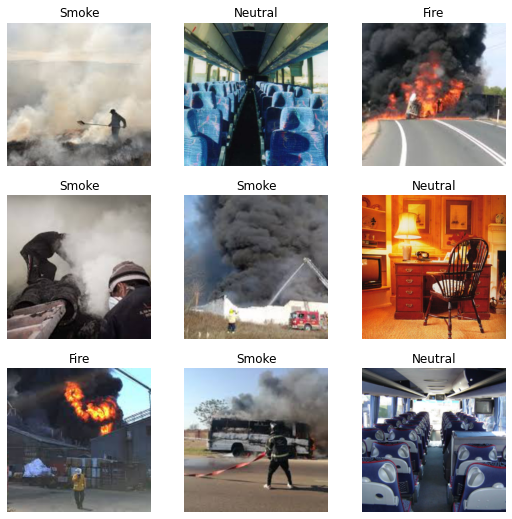

In [10]:
path=fastai_cfg().path('data')
path.mkdir(parents=True,exist_ok=True)
# !wget -q https://github.com/DeepQuestAI/Fire-Smoke-Dataset/releases/download/v1/FIRE-SMOKE-DATASET.zip
!unzip -qq -n ./FIRE-SMOKE-DATASET.zip -d {path}
db=DataBlock(blocks=(ImageBlock(),CategoryBlock()),
            get_items=get_image_files,get_y=parent_label,
            splitter=GrandparentSplitter(train_name='Train',valid_name='Test'),
            item_tfms=Resize(256),batch_tfms=[Normalize.from_stats(*imagenet_stats)])
dls=db.dataloaders(path)
dls.show_batch()



Typical image-dataset on which model is trained on are shown above

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /tmp/pip-req-build-yp9kxp8j/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


SuggestedLRs(valley=0.0008317637839354575)

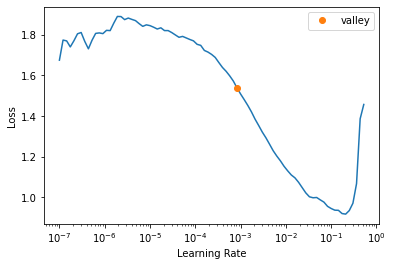

In [11]:
learn=cnn_learner(dls,resnet34, metrics=error_rate)
learn.lr_find()

### Training Phase

In [12]:
learn.fine_tune(8,1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.797758,0.248163,0.076667,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.249613,0.219383,0.066667,00:18
1,0.175252,0.179282,0.036667,00:17
2,0.123411,0.204060,0.043333,00:17
3,0.082175,0.210181,0.040000,00:17
4,0.059485,0.203628,0.030000,00:17
5,0.038008,0.213407,0.040000,00:17
6,0.025994,0.211817,0.033333,00:17
7,0.022013,0.211444,0.036667,00:18


### False Positives and False Negetives

The accuracy achieved here is around **96 %** which must be fairly accurate to predict fire, seeing smoke and fire. Confusion matrix below shows the information about False Positive, False Negetive i.e. Confusions of the model.

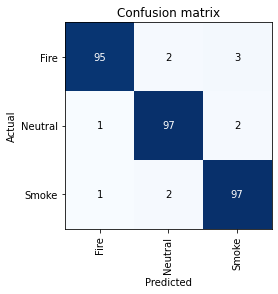

In [13]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Results

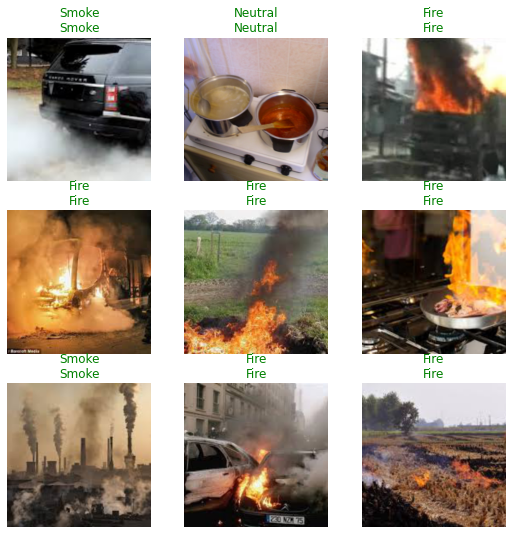

In [14]:
learn.show_results()

In [15]:
learn.export('fire_smoke_export')

In [22]:
# del learn
learn_inf=load_learner('./fire_smoke_export')

## Testing the Model
Training is completed and lets test the model with real world pictures. Since more applicable zone is at turbine front area, lets test this model with turbine front images, which must be enough confusing and still result should be as expected.


In [42]:
# !wget -q https://user-images.githubusercontent.com/19243618/144703125-7898eb07-3d25-4734-b221-bffeb0101890.jpeg -P ./images
# !wget -q https://user-images.githubusercontent.com/19243618/144696440-70fb611c-583d-45bd-9427-cc72319ba69f.jpeg -P ./images
# !wget -q https://user-images.githubusercontent.com/19243618/144696493-bd00fe41-ed8d-44dd-858c-e833edd75d10.jpeg -P ./images
# !wget -q https://user-images.githubusercontent.com/19243618/144696533-aca4be43-996f-4be6-a87f-1e22977dbf70.jpeg -P ./images




#### Testing at Turbine front

Model predicted **Neutral** at the turbine front area with 99.+ % confidence 

('Neutral', tensor(1), tensor([1.4750e-06, 9.9745e-01, 2.5499e-03]))


<AxesSubplot:>

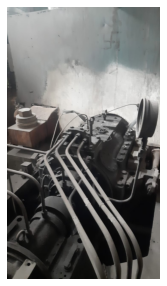

In [50]:
img1=PILImage.create('./images/144696440-70fb611c-583d-45bd-9427-cc72319ba69f.jpeg')
print(learn_inf.predict(img1))
img1.show()


#### Testing at Turbine front area

Though image looking like fire due to high intensity sodium lamps, still image was predicted to the actual condition to be Neutral

Neutral


<AxesSubplot:>

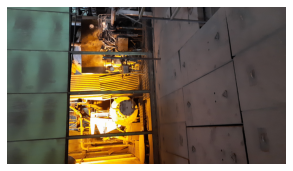

In [49]:
img2=PILImage.create('images/144696493-bd00fe41-ed8d-44dd-858c-e833edd75d10.jpeg')
print(learn_inf.predict(img2)[0])
img2.show()

#### Detecting Fire and Smoke

Smoke


<AxesSubplot:>

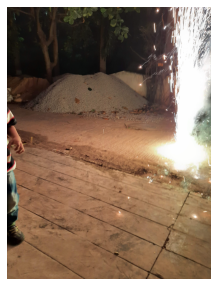

In [46]:
img3=PILImage.create('./images/144696881-807bcc4d-c209-42b5-99f2-54f148e070e6.jpg')
print(learn_inf.predict(img3)[0])
img3.show()

Fire


<AxesSubplot:>

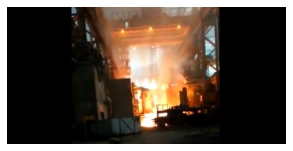

In [47]:
img4=PILImage.create('./images/144703004-a4dbc6d7-43d0-40fe-9985-7c75e1da62ba.png')
print(learn_inf.predict(img4)[0])
img4.show()

Smoke


<AxesSubplot:>

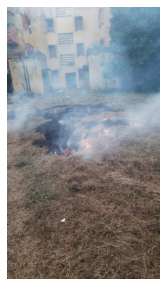

In [48]:
img5=PILImage.create('./images/144703125-7898eb07-3d25-4734-b221-bffeb0101890.jpeg')
print(learn_inf.predict(img5)[0])
img5.show()